# GitHub Dataset
姓名：廖嘉琦

学号：1120200733

## Step 0 导入相关库
包括pandas，matplotlib，seaborn，并设置matplotlib的中文字体。

In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## Step 1 读入数据
从`repository_data.csv`中读入数据，解析后存入`pandas`的`DataFrame`中。

In [158]:
repository_df = pd.read_csv('repository_data.csv')
print(repository_df.shape)
repository_df.head()

(2917951, 10)


,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"['TypeScript', 'JavaScript', 'CSS', 'Shell', '...",32231.00,2014-12-24T17:49:19Z,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,NaN,NaN,3189.00,2019-03-26T07:31:14Z,Other
2,free-programming-books,262380,53302,9544,8235,NaN,NaN,8286.00,2013-10-11T06:50:37Z,Other
3,coding-interview-university,244927,65038,8539,867,NaN,NaN,2314.00,2016-06-06T02:34:12Z,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,NaN,NaN,1074.00,2014-07-11T13:42:37Z,Creative Commons Zero v1.0 Universal


## Step 2 数据预处理
检查异常数据，发现部分字段存在缺失值，对缺失值进行处理。

去除掉数值属性的缺失值，对于`licence`字段的缺失值，采用填充的方法，填充为`Unknown`；对于`language`字段的缺失值，填充为`None`，同理`languages_used`字段的缺失值填充为`['None']`。

In [159]:
import ast

for column in repository_df.columns:
    cnt_na = repository_df[column].isna().sum()
    if cnt_na > 0:
        print(f'{column} has {cnt_na} missing values')

repository_df.dropna(subset=['name', 'stars_count', 'forks_count',
                     'watchers', 'commit_count', 'created_at'], inplace=True)
repository_df['primary_language'].fillna('None', inplace=True)
repository_df['languages_used'].fillna("['None']", inplace=True)
repository_df['licence'].fillna('Unknown', inplace=True)
repository_df['commit_count'] = repository_df['commit_count'].astype(int)
repository_df['created_at'] = pd.to_datetime(repository_df['created_at'])
repository_df['licence'] = repository_df['licence'].astype(str)
repository_df['languages_used'] = repository_df['languages_used'].apply(ast.literal_eval)
repository_df['primary_language'] = repository_df['primary_language'].astype(str)
print(repository_df.shape)
repository_df.head()

name has 13 missing values
primary_language has 218573 missing values
languages_used has 221984 missing values
commit_count has 1921 missing values
licence has 1378200 missing values
(2916017, 10)


,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"[TypeScript, JavaScript, CSS, Shell, Dockerfil...",32231,2014-12-24 17:49:19+00:00,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,None,[None],3189,2019-03-26 07:31:14+00:00,Other
2,free-programming-books,262380,53302,9544,8235,None,[None],8286,2013-10-11 06:50:37+00:00,Other
3,coding-interview-university,244927,65038,8539,867,None,[None],2314,2016-06-06 02:34:12+00:00,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,None,[None],1074,2014-07-11 13:42:37+00:00,Creative Commons Zero v1.0 Universal


删除缺失值后，仍有99.93%的数据保留，因此对后续分析几乎不会产生影响。

## Step 3 数据分析

0. 数值型数据的描述性统计

In [160]:
pd.set_option('display.float_format', '{:.2f}'.format)
repository_df.describe()

,stars_count,forks_count,watchers,pull_requests,commit_count
count,2916017.00,2916017.00,2916017.00,2916017.00,2916017.00
mean,76.45,20.96,7.14,24.32,614.37
std,909.98,303.05,37.63,378.57,16808.04
min,2.00,0.00,0.00,0.00,1.00
25%,7.00,1.00,2.00,0.00,9.00
50%,12.00,4.00,3.00,1.00,27.00
75%,30.00,11.00,6.00,6.00,89.00
max,359805.00,242208.00,9544.00,301585.00,4314502.00


In [161]:
columns = ['stars_count', 'forks_count',
           'watchers', 'pull_requests', 'commit_count']

for column in columns:
    avg = repository_df[column].mean()
    percentile_99 = repository_df[column].quantile(q=0.99)
    print(f'{column} has average {avg:.2f}, and 99th percentile {percentile_99:.2f}')

stars_count has average 76.45, and 99th percentile 823.00
forks_count has average 20.96, and 99th percentile 233.00
watchers has average 7.14, and 99th percentile 67.00
pull_requests has average 24.32, and 99th percentile 400.00
commit_count has average 614.37, and 99th percentile 2927.00


不难发现，数据中存在极少数的巨大值，因此在绘制图时，为了方便观察，选择了三种方式：所有数据、去除最大的10%后的数据、log变换后的数据。

In [162]:
def draw(column, name):
    plt.figure(figsize=(30, 12))
    plt.subplot(2, 3, 1)
    repository_df[column].hist(bins=50, edgecolor='k')
    plt.title(f'{name} Histogram')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, 2)
    percentile_95 = repository_df[column].quantile(0.95)
    repository_df[repository_df[column] <= percentile_95][column].hist(
        bins=50, edgecolor='k')
    plt.title(f'Without top 5% {name} Histogram')
    plt.xlabel(name)
    plt.ylabel('Frequency')

    # 绘制对数变换后的直方图
    plt.subplot(2, 3, 3)
    np.log1p(repository_df[column]).hist(
        bins=50, edgecolor='k')
    plt.title(f'Log-transformed {name} Histogram')
    plt.xlabel(f'Log-transformed {name} Count')
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 4)
    plt.boxplot(repository_df[column], vert=False, patch_artist=True)
    plt.title(f'{name} Box Plot')
    plt.xlabel(name)
    
    plt.subplot(2, 3, 5)
    plt.boxplot(repository_df[repository_df[column] <= percentile_95][column], vert=False, patch_artist=True)
    plt.title(f'Without top 5% {name} Histogram')
    plt.xlabel(name)
    plt.ylabel('Frequency')

    plt.subplot(2, 3, 6)
    plt.boxplot(np.log1p(repository_df[column]),
                vert=False, patch_artist=True)
    plt.title(f'Log-transformed {name} Box Plot')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show();

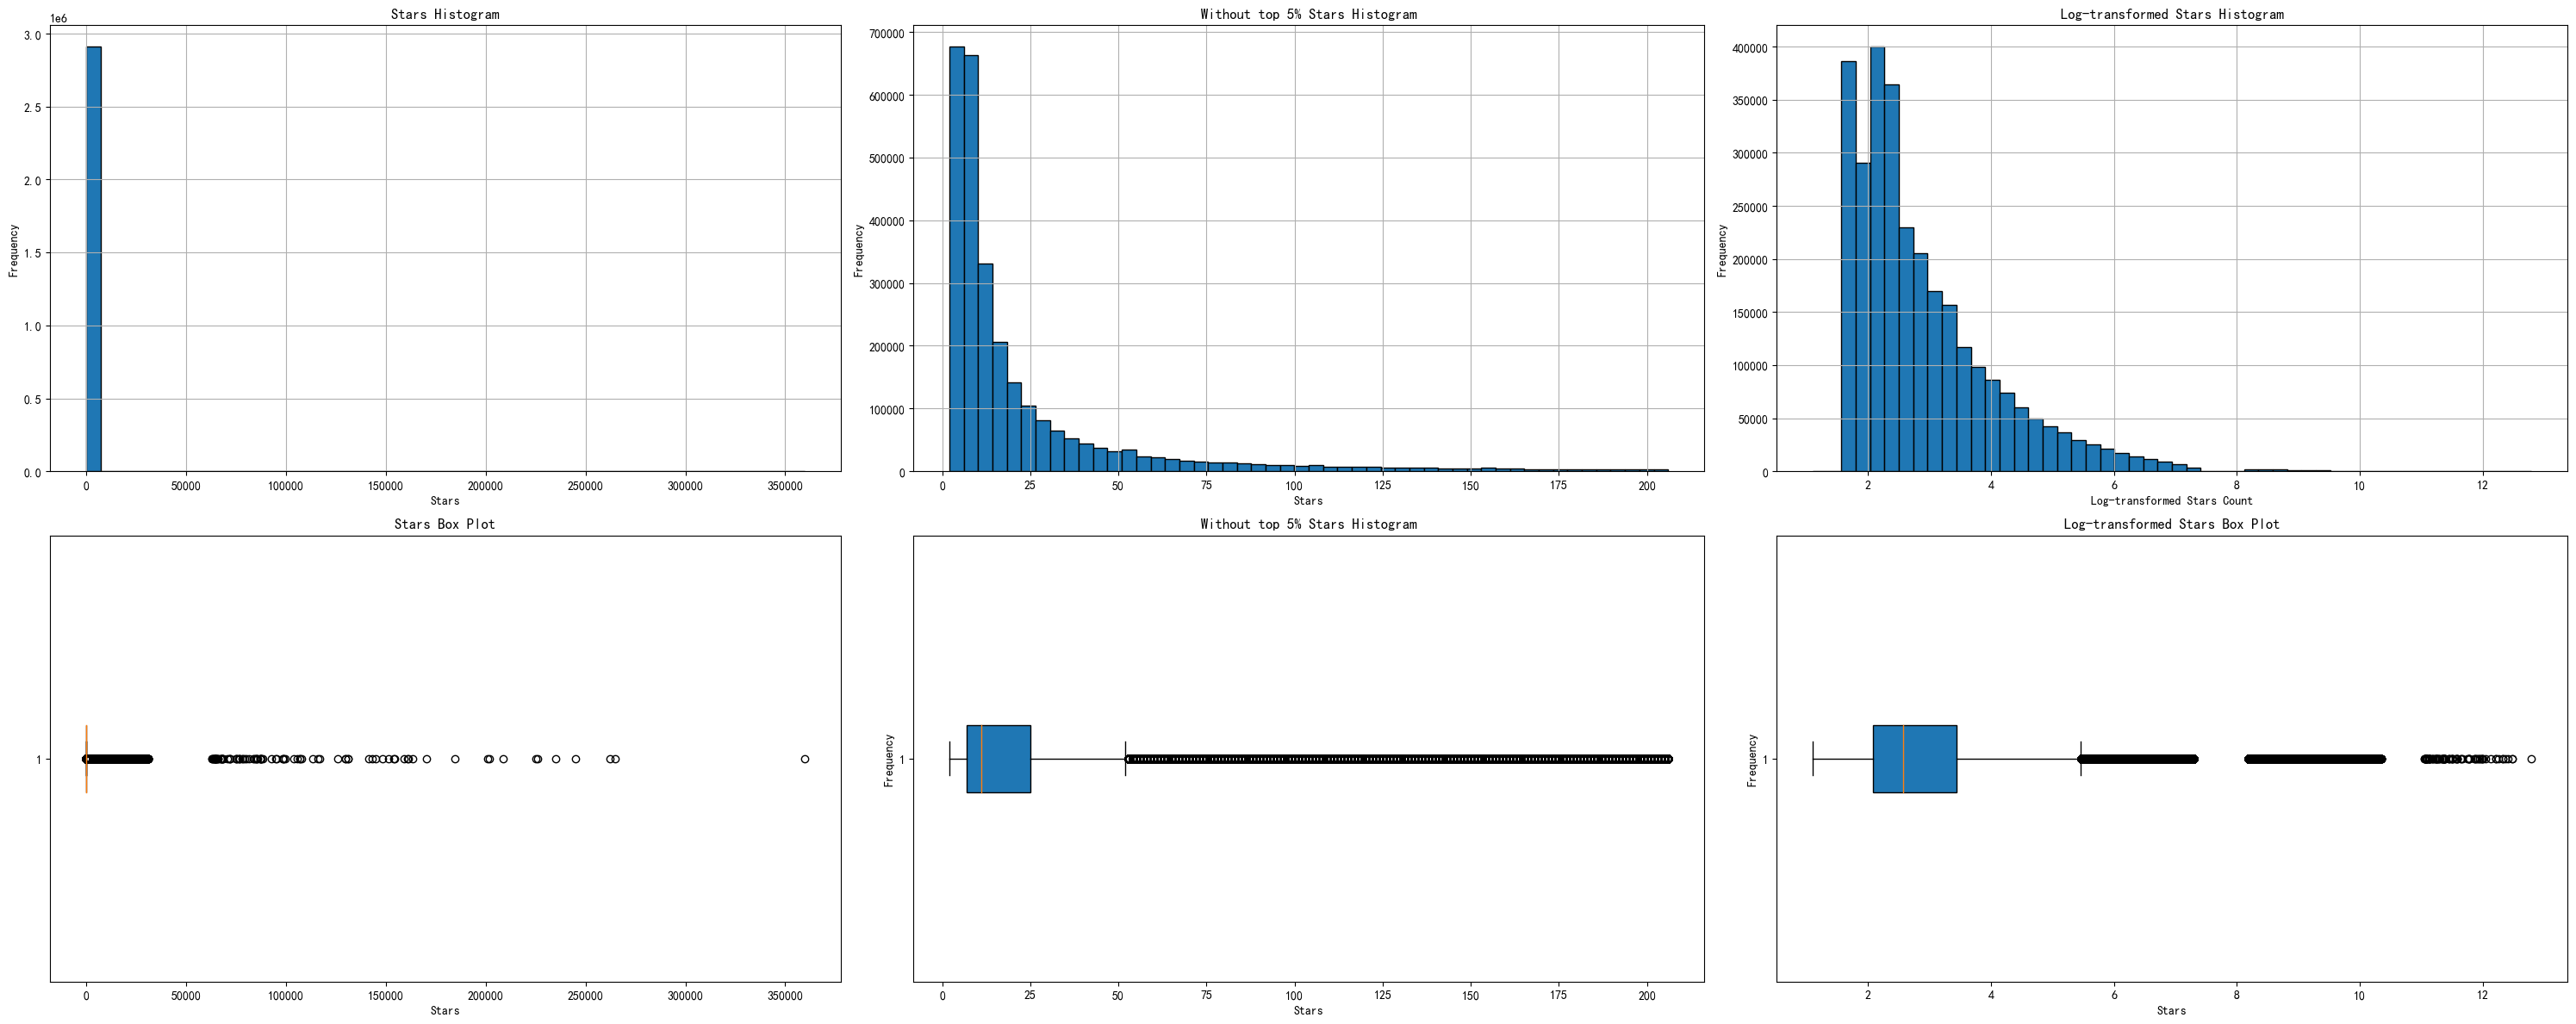

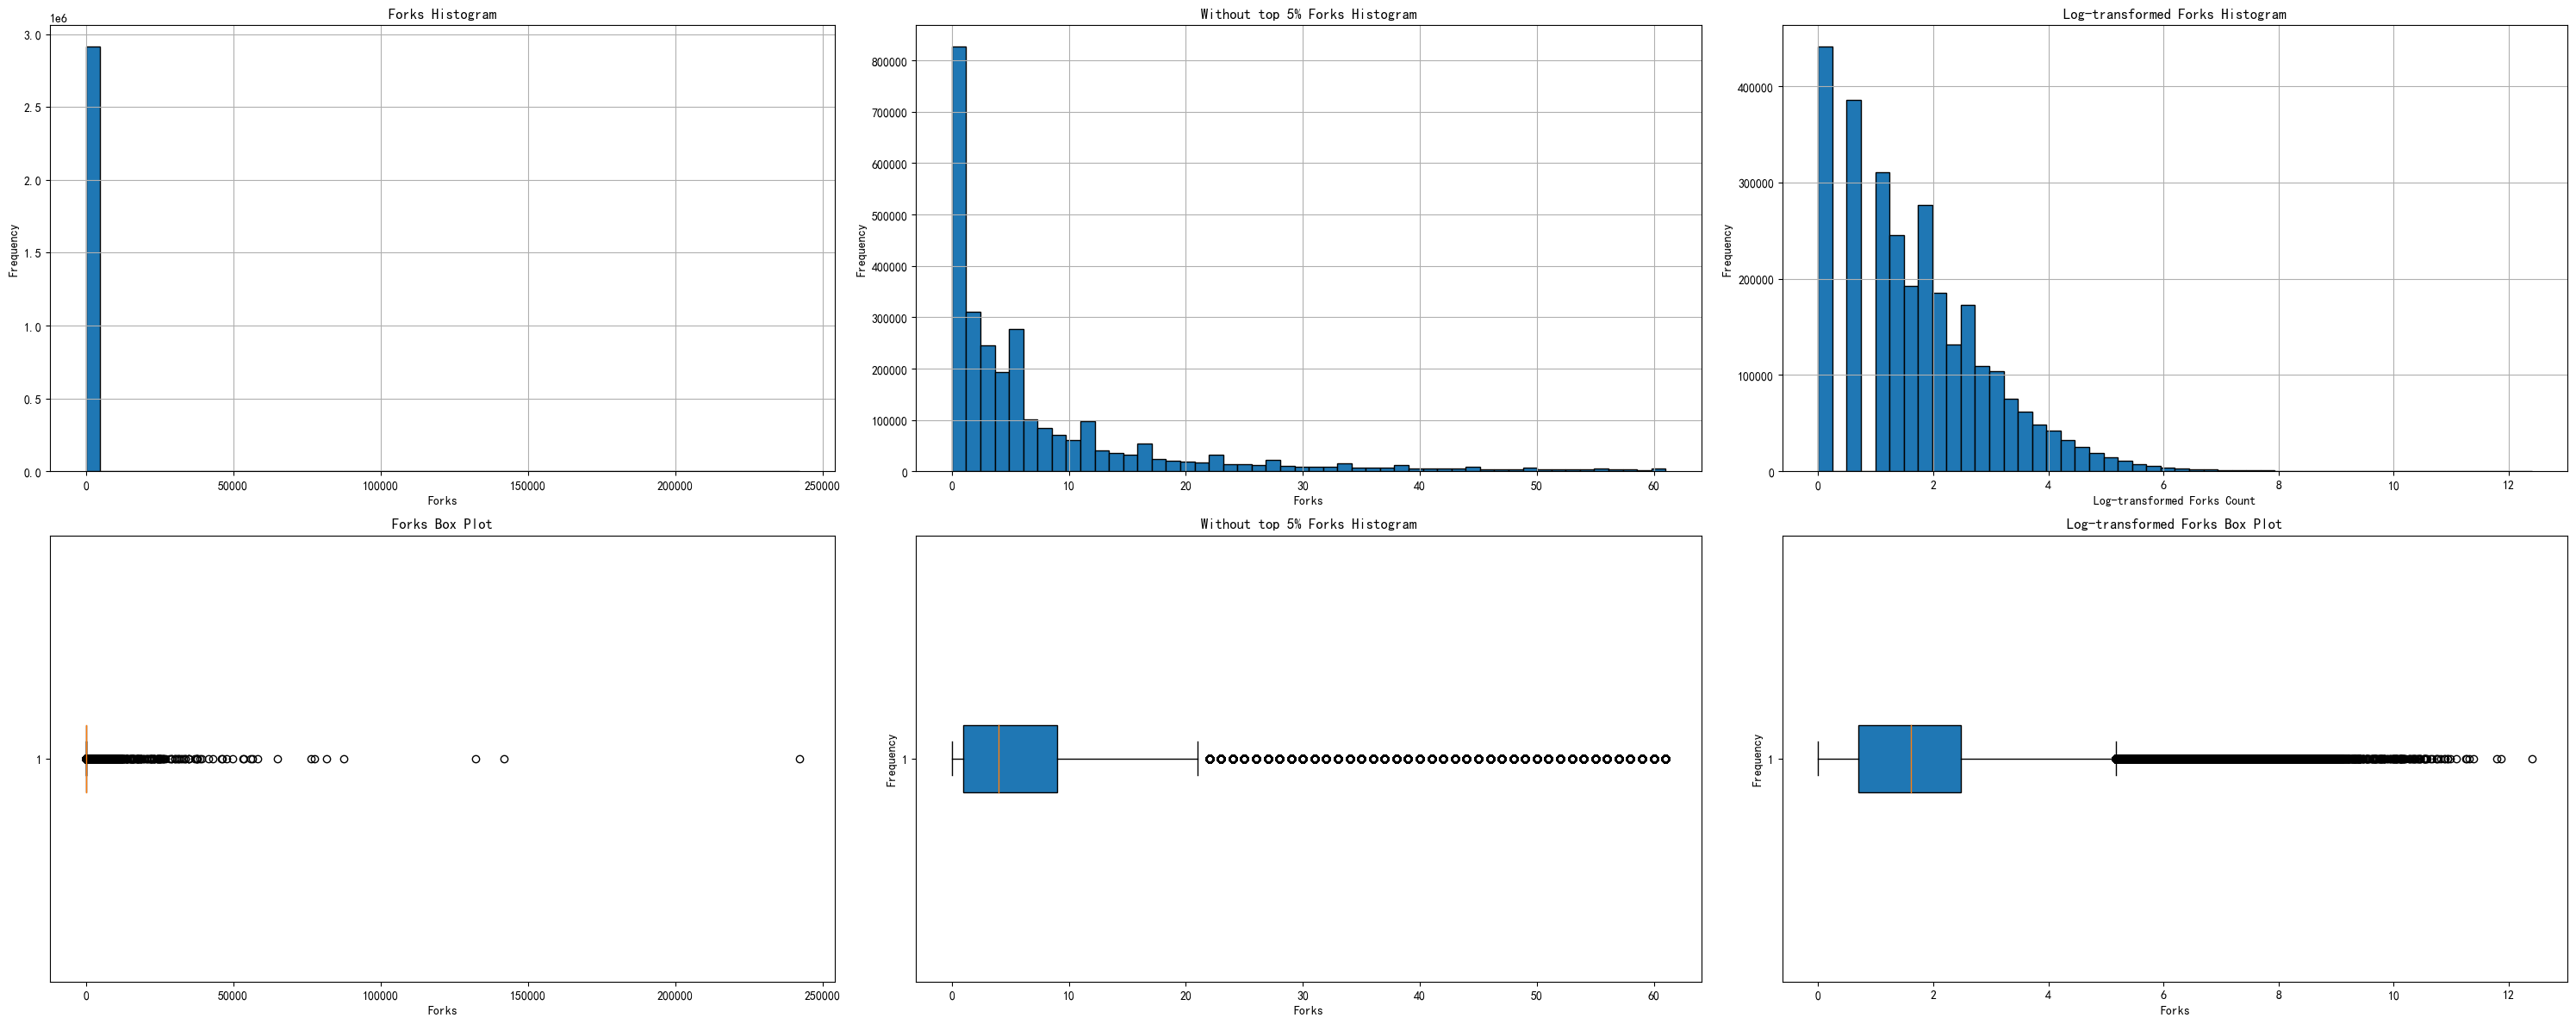

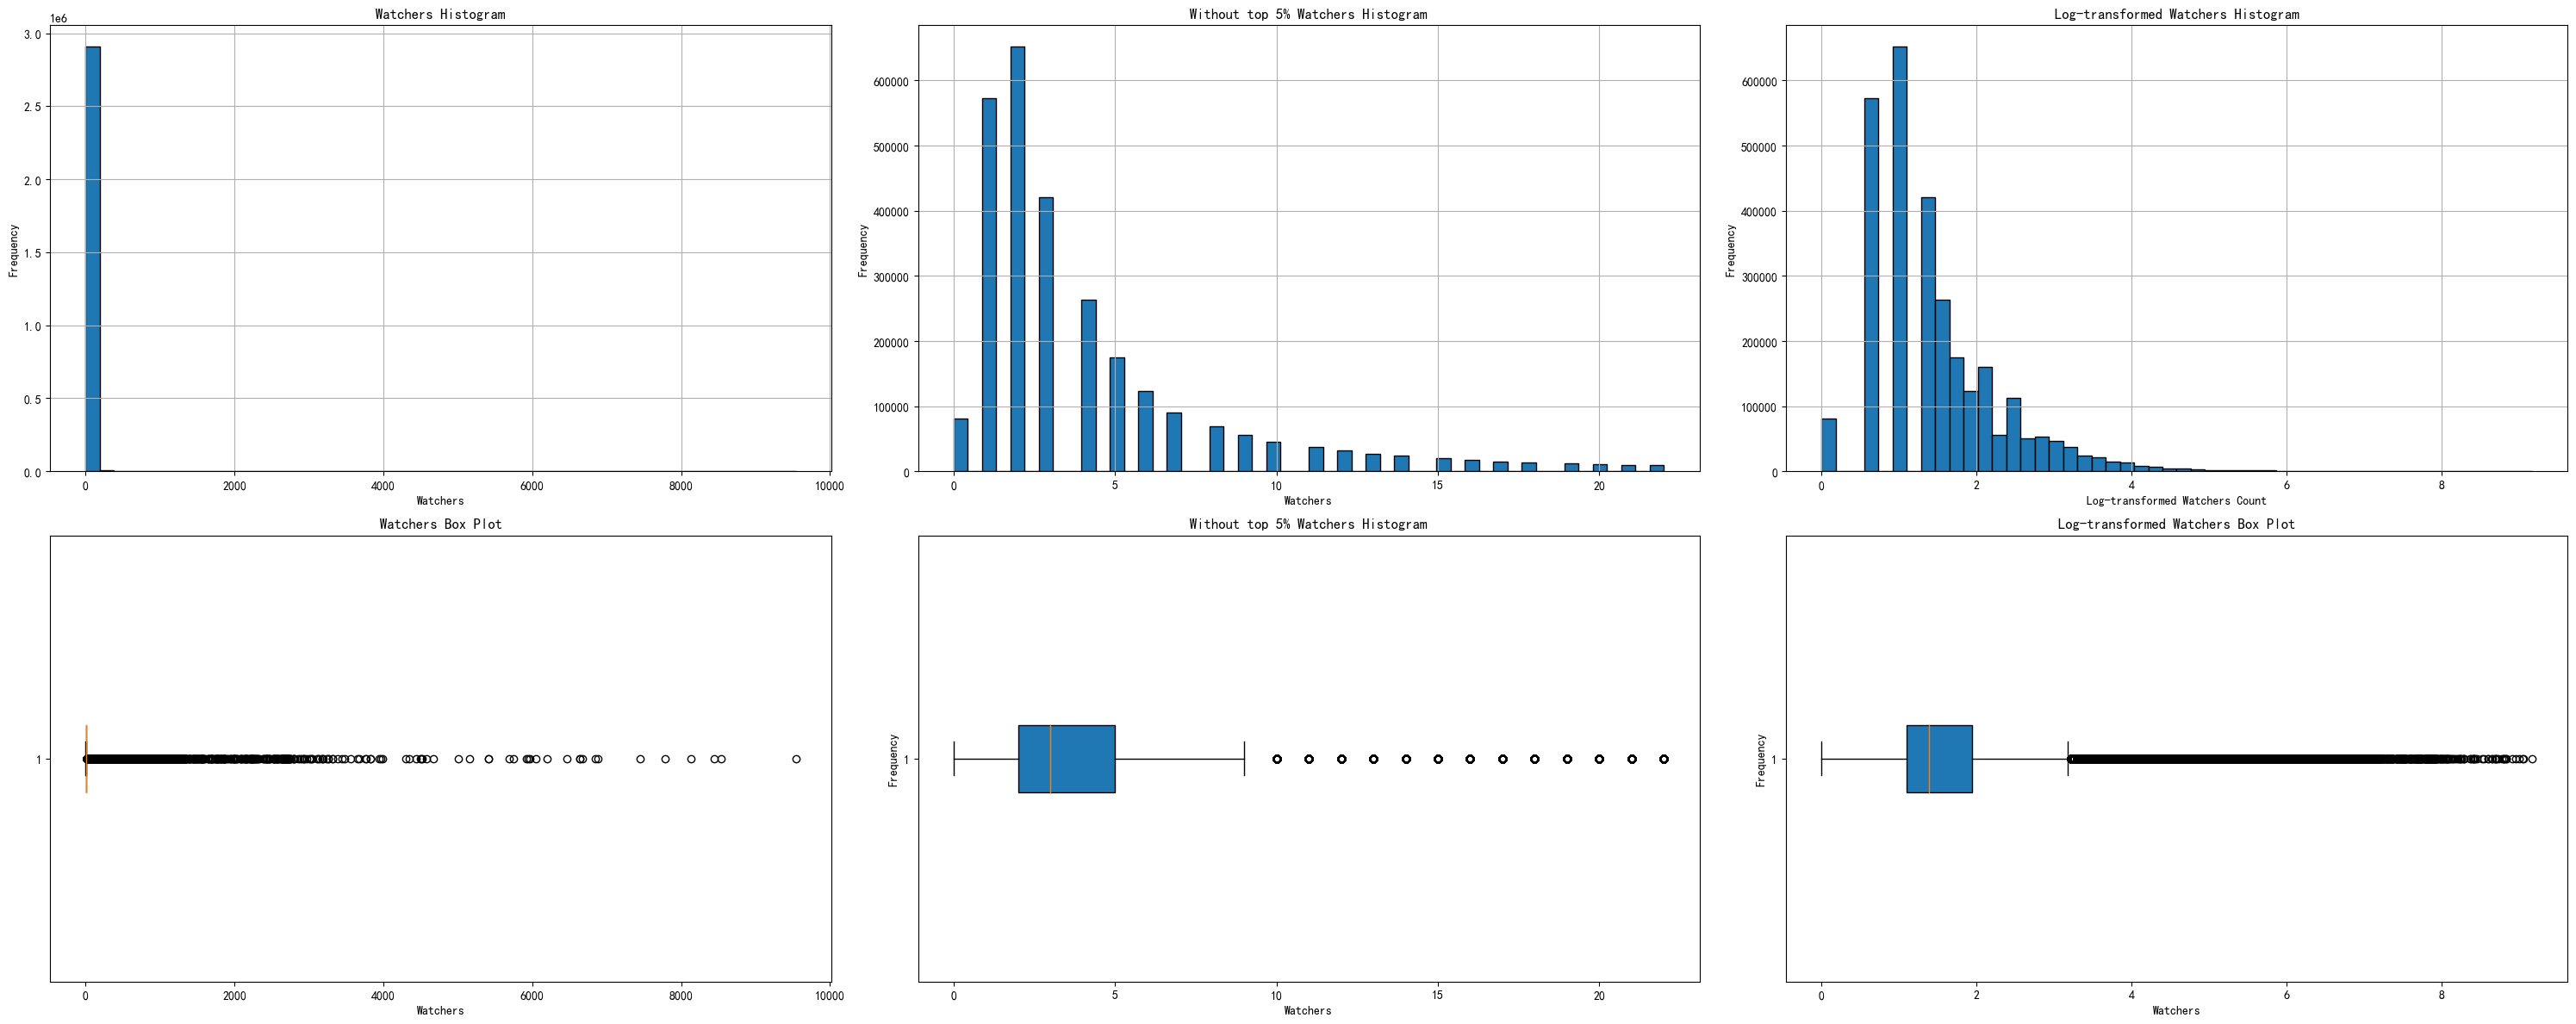

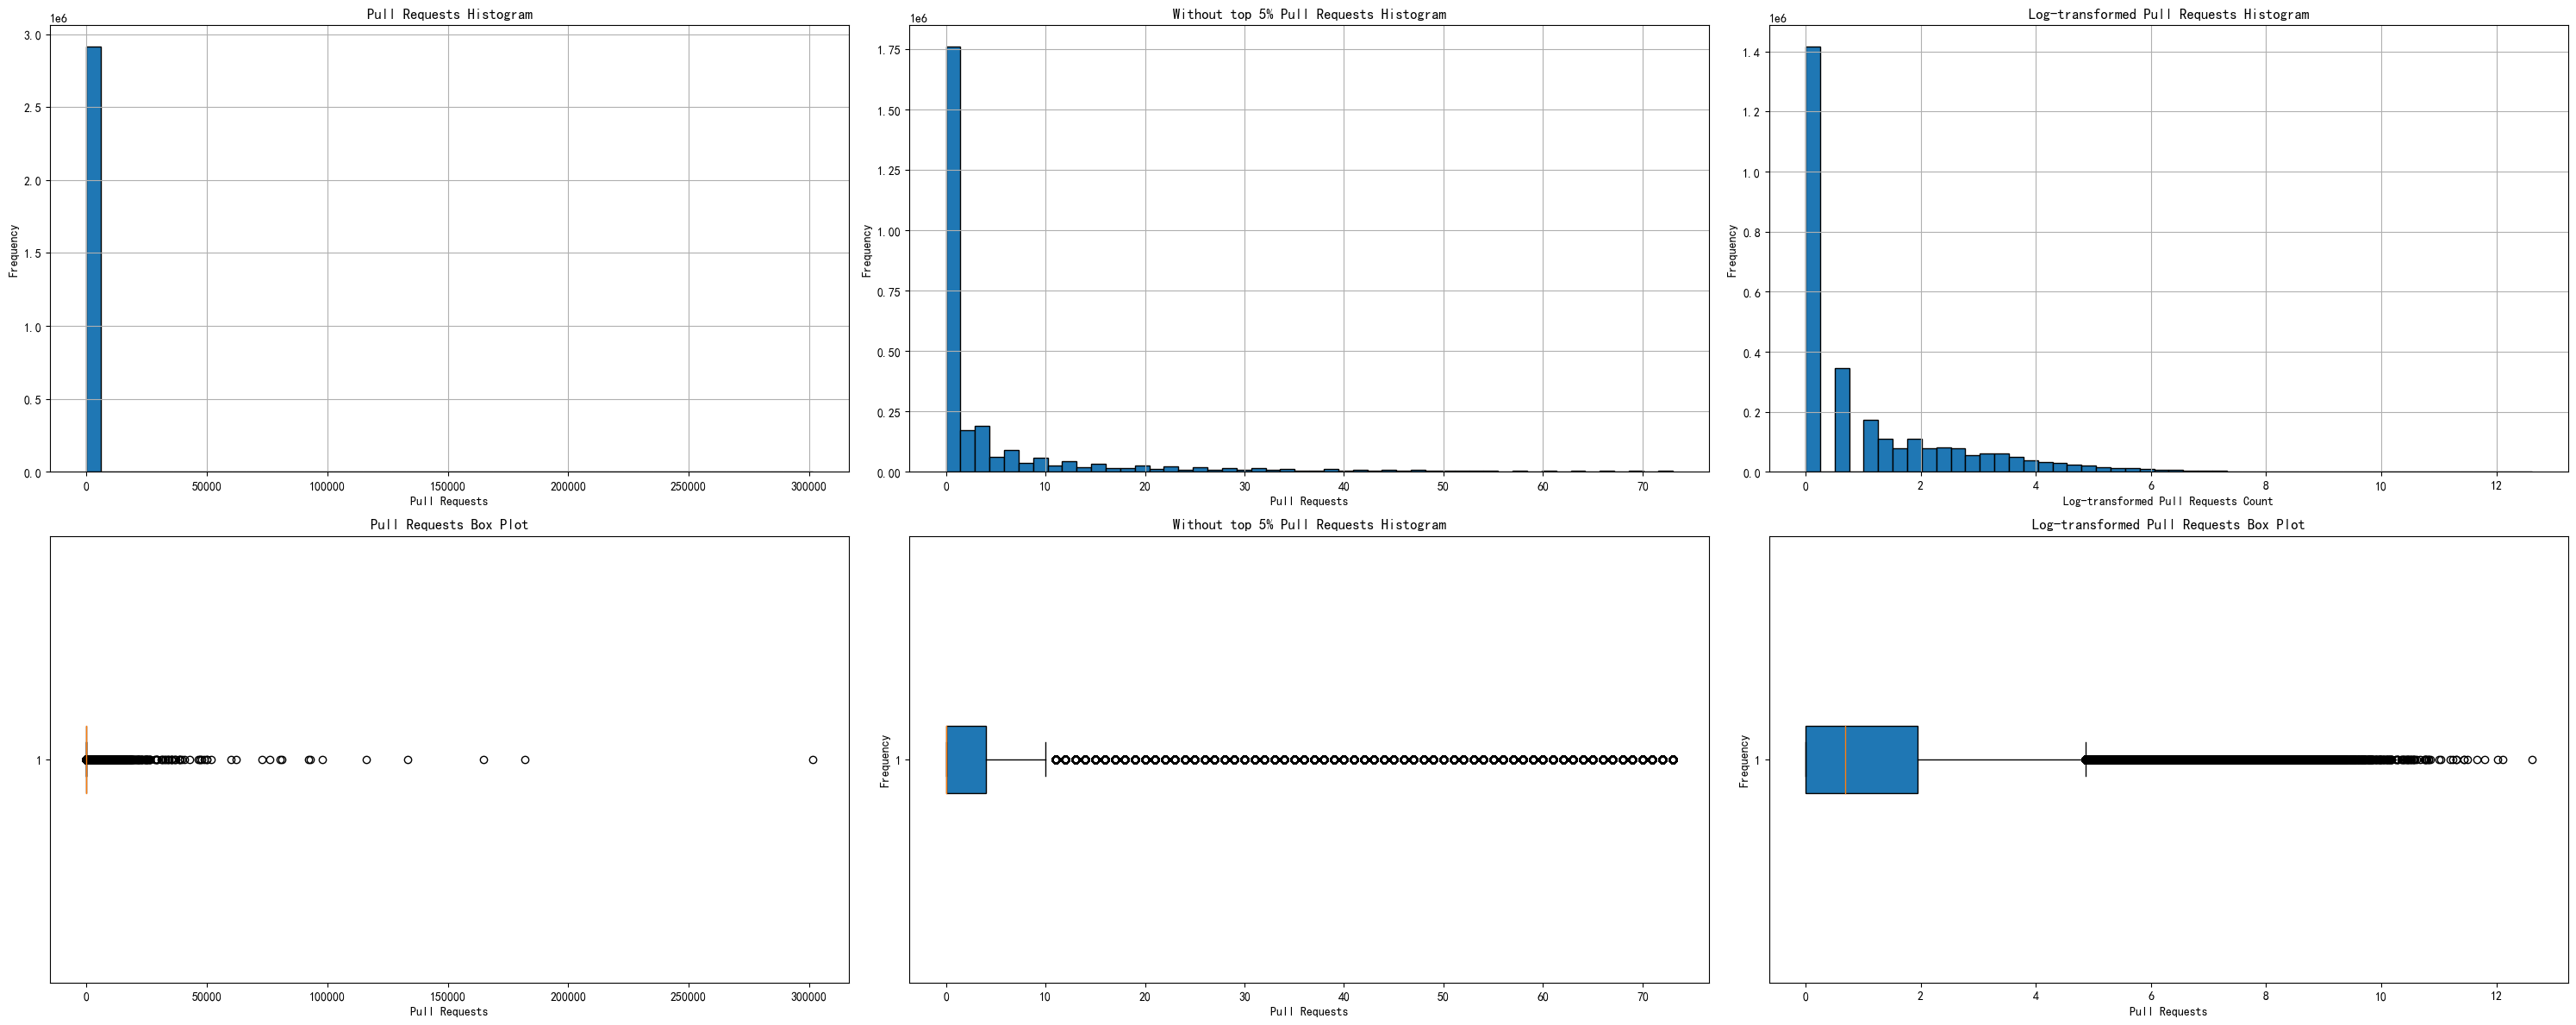

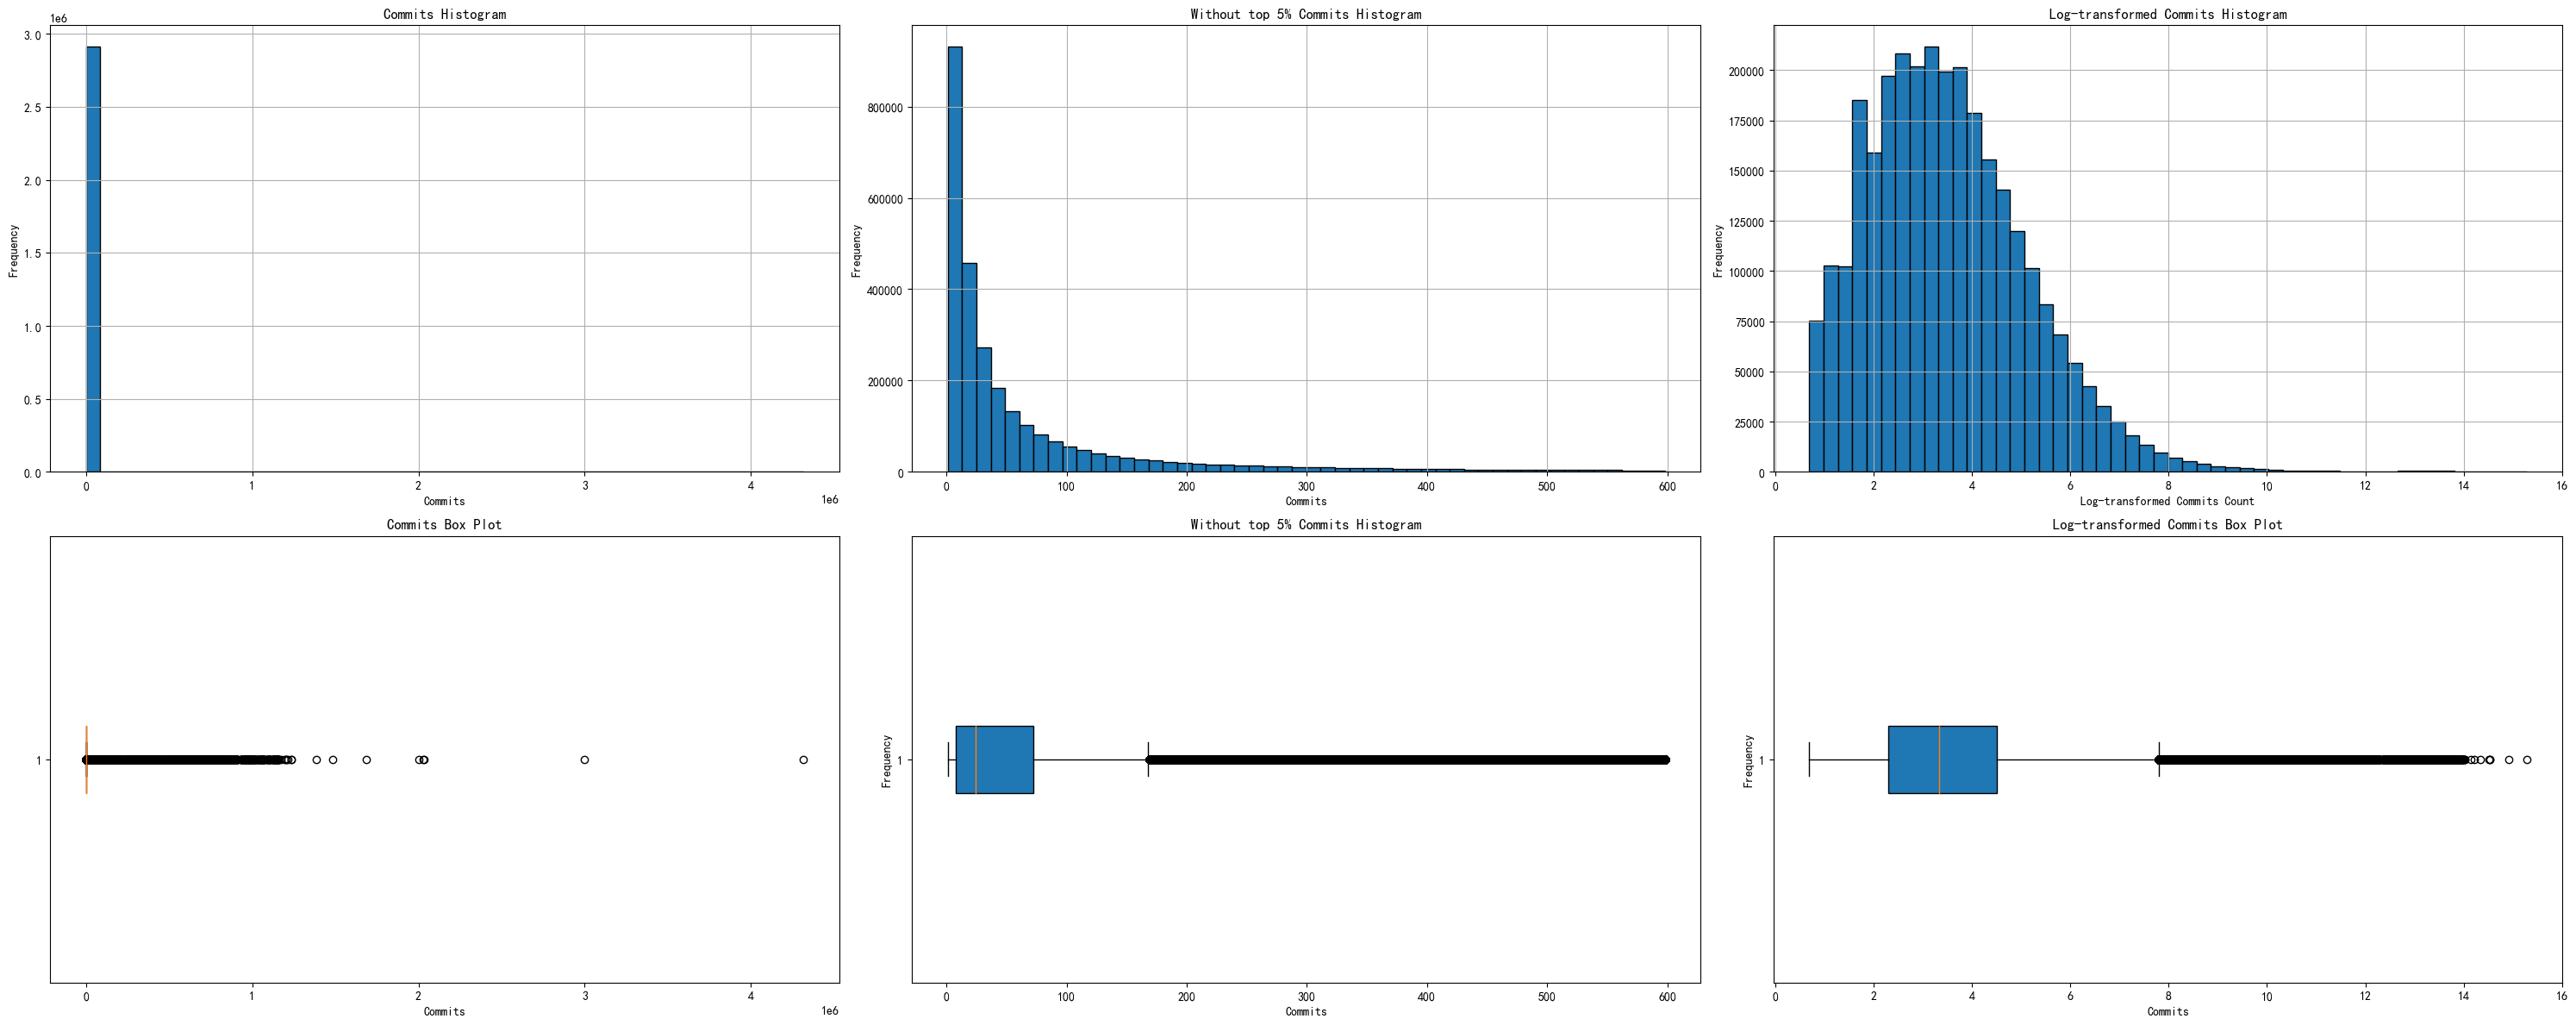

In [163]:
names = ['Stars', 'Forks', 'Watchers', 'Pull Requests', 'Commits']

for column, name in zip(columns, names):
    draw(column, name)

接下来，分析使用的**首要语言**和**使用语言**的分布情况。

首要语言：共有 498 种语言，其中占比超过 0.1% 的有 50 种


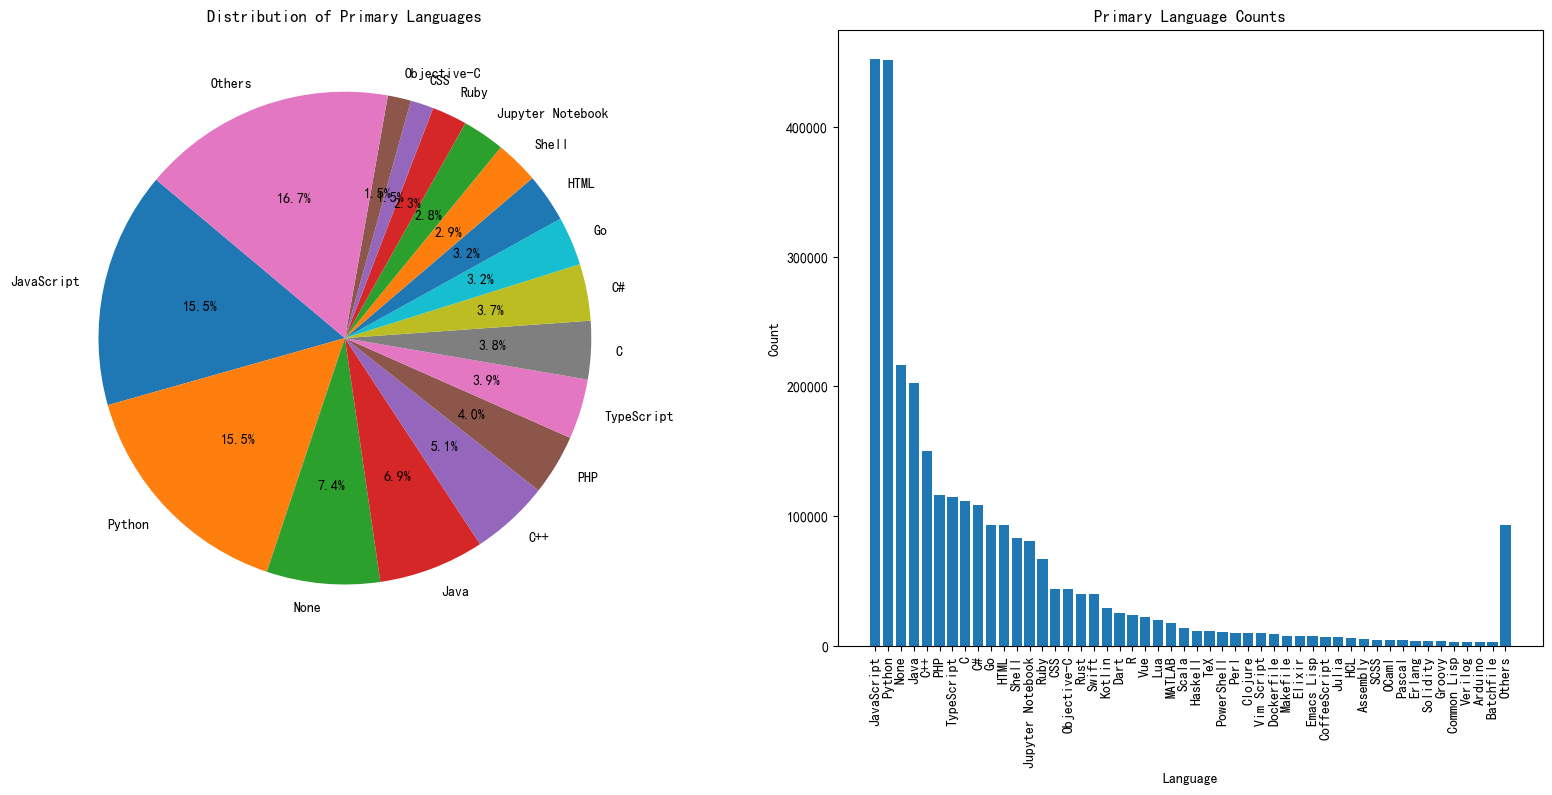

In [164]:
# 计算每种语言出现的次数
language_counts = repository_df['primary_language'].value_counts()

# 定义阈值，比如所有占总数小于1.5%的语言将被归入"Others"
threshold_percent = 1.5
threshold = threshold_percent / 100 * language_counts.sum()

# 将小于阈值的语言归类为"Others"
filtered_languages = language_counts[language_counts > threshold]
others_count = language_counts[language_counts <= threshold].sum()
if others_count > 0:
    filtered_languages['Others'] = others_count

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(filtered_languages, labels=filtered_languages.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Primary Languages');

plt.subplot(1, 2, 2)
# 定义阈值，比如所有占总数小于1.5%的语言将被归入"Others"
threshold_percent = 0.1
threshold = threshold_percent / 100 * language_counts.sum()

# 将小于阈值的语言归类为"Others"
filtered_languages = language_counts[language_counts > threshold]
others_count = language_counts[language_counts <= threshold].sum()
if others_count > 0:
    filtered_languages['Others'] = others_count
plt.bar(filtered_languages.index, filtered_languages)
plt.title('Primary Language Counts')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90);
print(f'首要语言：共有 {len(language_counts)} 种语言，其中占比超过 {threshold_percent}% 的有 {len(filtered_languages)} 种')

所有语言：共有 529 种语言，其中占比超过 0.1% 的有 50 种


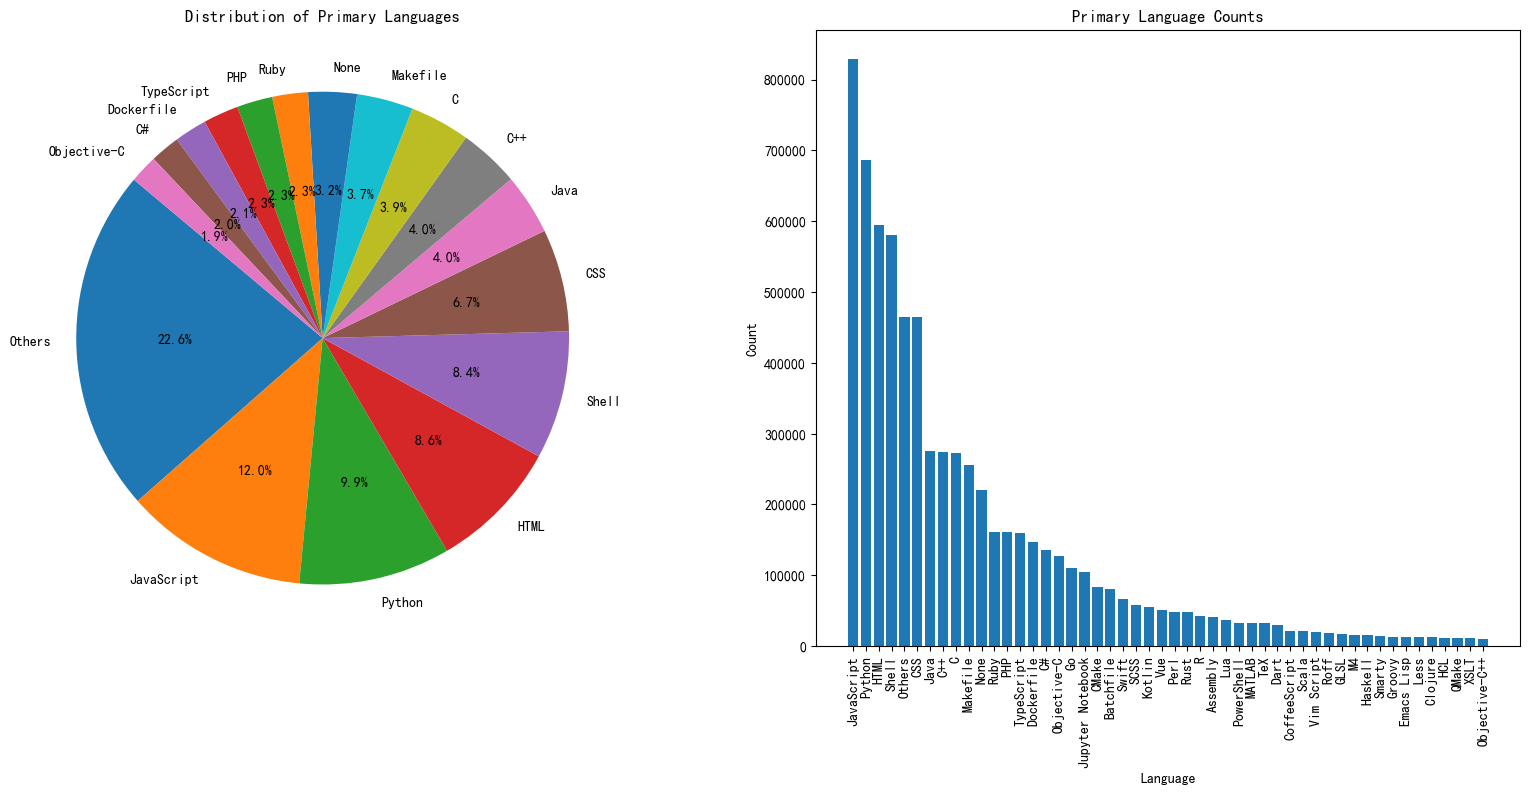

In [165]:
from collections import Counter

def filter(threshold_percent, df):
    threshold = threshold_percent / 100 * df['Count'].sum()
    filtered_data = df[language_counts_df['Count'] > threshold].copy()
    others_count = df[language_counts_df['Count'] <= threshold]['Count'].sum()
    filtered_data.loc[len(filtered_data)] = ['Others', others_count]
    filtered_data = filtered_data.sort_values(
        'Count', ascending=False)
    return filtered_data

language_counts = Counter(
    [lang for sublist in repository_df['languages_used'] for lang in sublist])

language_counts_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
filtered_languages = filter(1.5, language_counts_df)
plt.pie(filtered_languages['Count'], labels=filtered_languages['Language'],
        autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Primary Languages')

plt.subplot(1, 2, 2)
filtered_languages = filter(0.15, language_counts_df)
plt.bar(filtered_languages['Language'], filtered_languages['Count'])
plt.title('Primary Language Counts')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
print(f'所有语言：共有 {len(language_counts)} 种语言，其中占比超过 {threshold_percent}% 的有 {len(filtered_languages)} 种')

再分析每年的**新增仓库数**的变化情况。

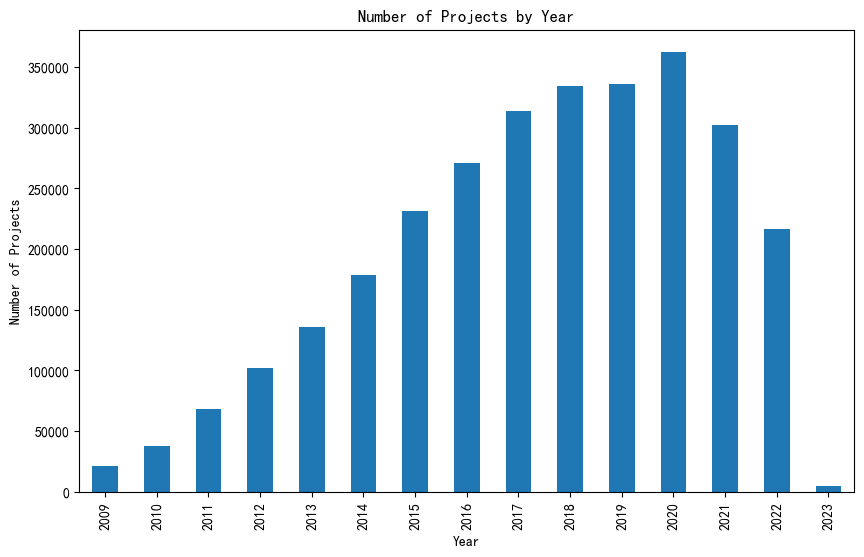

In [166]:
repository_df['year'] = repository_df['created_at'].dt.year
yearly_counts = repository_df.groupby('year').size()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('Number of Projects by Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.show()

最后分析数据之间的相关性。

In [167]:
def calculate_correlation(df, x, y):
    pearson_corr = df[x].corr(df[y], method='pearson')
    print(f"{x}与{y}的皮尔森相关系数: {pearson_corr:.2f}")

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        calculate_correlation(repository_df, columns[i], columns[j])

stars_count与forks_count的皮尔森相关系数: 0.57
stars_count与watchers的皮尔森相关系数: 0.71
stars_count与pull_requests的皮尔森相关系数: 0.19
stars_count与commit_count的皮尔森相关系数: 0.02
forks_count与watchers的皮尔森相关系数: 0.49
forks_count与pull_requests的皮尔森相关系数: 0.21
forks_count与commit_count的皮尔森相关系数: 0.02
watchers与pull_requests的皮尔森相关系数: 0.16
watchers与commit_count的皮尔森相关系数: 0.02
pull_requests与commit_count的皮尔森相关系数: 0.05


皮尔森相关系数表明，`stars_count`与`watchers`的线性关系较强，而`watchers`与`commit_count`几乎没有线性关系。